In [2]:
import pandas as pd
import seaborn as sns
#fornisce un'interfaccia ad alto livello per la creazione di grafici statistici
import matplotlib.pyplot as plt
import numpy as np
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline  
#pipeline= sistema di elementi in cui ogni elemento ha un dato di ingresso, elabora e restituisce dati output
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay


In [4]:
df=pd.read_csv("datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
input_cols=[
    'Pregnancies','BloodPressure','SkinThickness','Insulin','Glucose','BMI','DiabetesPedigreeFunction','Age'
]   #non considero la colonna outcome
X=df[input_cols] #features
y=df.Outcome    #target variable

<Axes: title={'center': 'Distribuzione'}, xlabel='Outcome'>

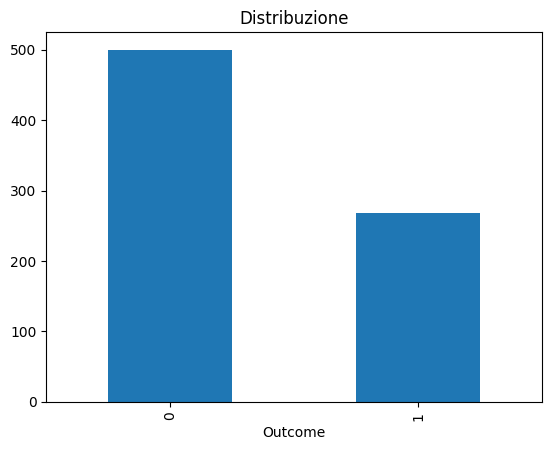

In [7]:
df.pivot_table(index="Outcome", aggfunc="size").plot(kind="bar",title="Distribuzione")

Il dataset è sbilanciato, c'è un apercentuale maggiore di persone non a rischio diabete.

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=16)

In [13]:
scaler=MinMaxScaler().fit(X_train)  #tecninca di preprocessing dei dati
X_scaled=scaler.transform(X_train) 

In [14]:
pipe=make_pipeline(MinMaxScaler(),LogisticRegression())
pipe.fit(X_train,y_train) #la fit si fa prima sul minmax e poi sulla logistic regression

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

0.8177083333333334


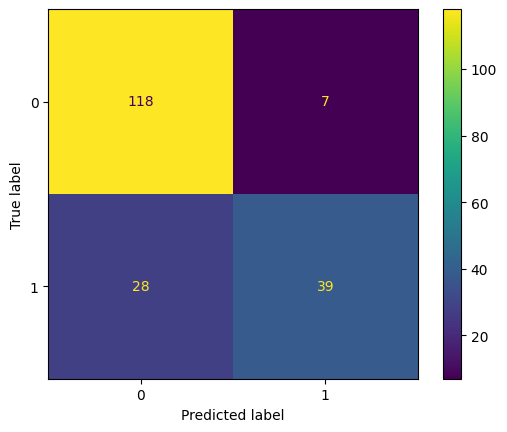

In [15]:
y_pred=pipe.predict(X_test)
print(accuracy_score(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(pipe,X_test,y_test)

Faccio l'81% di previsioni giuste sul totale, ma è poco significativo perche il dataset è sbilanciato

118+7 osservazioni non a rischio diabete
Di quelle a rischio diabete ne sono state predette correttamente solo 39 su 39+28

In [17]:
#instantiate the model (using the default parameters)
logreg= LogisticRegression(
    random_state=42
)

#fit the model with data
logreg.fit(X_train,y_train)

/Users/uffa/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

0.8177083333333334


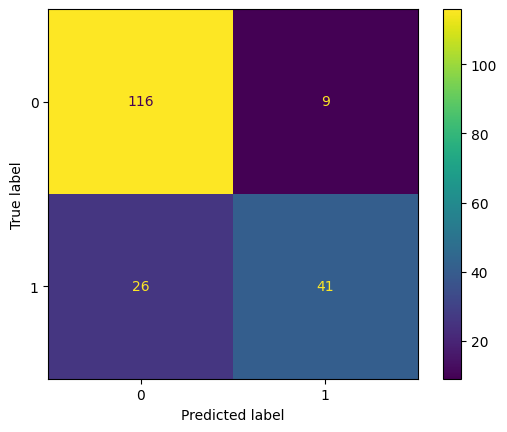

In [18]:
y_pred=logreg.predict(X_test)
print(accuracy_score(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(logreg, X_test,y_test)

Questi cambiamenti a livello di pipeline e di modello mi producono risultati diversi anche a partità di accuracy